In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=18)

In [9]:
# Without scaling
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.63

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [11]:
# With scaling
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
model.score(X_test_scaled, y_test)

0.85

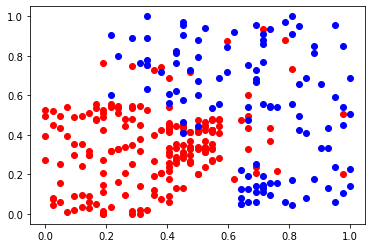

In [14]:
class_0 = X_train_scaled[y_train==0]
class_1 = X_train_scaled[y_train==1]

plt.scatter(class_0[:,0], class_0[:,1], c='red')
plt.scatter(class_1[:,0], class_1[:,1], c='blue')

In [17]:
import numpy as np
A = np.arange(0,100)/100
grid = []
for age in A:
    for sal in A:
        grid.append([age,sal])
grid = np.array(grid)
grid.shape

(10000, 2)

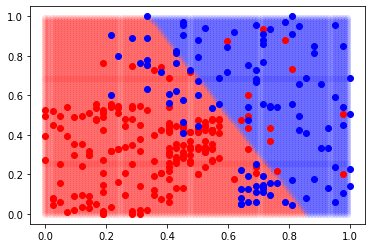

In [20]:
yp = model.predict(grid)
class_0 = grid[yp==0]
class_1 = grid[yp==1]
plt.scatter(class_0[:,0], class_0[:,1], c='red', alpha=0.1)
plt.scatter(class_1[:,0], class_1[:,1], c='blue',  alpha=0.1)

# Plotting Training data with actual classes
class_0 = X_train_scaled[y_train==0]
class_1 = X_train_scaled[y_train==1]

plt.scatter(class_0[:,0], class_0[:,1], c='red')
plt.scatter(class_1[:,0], class_1[:,1], c='blue')

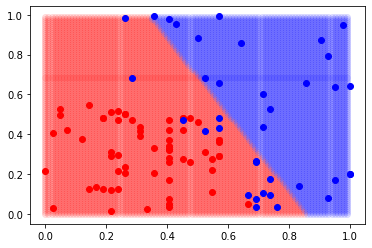

In [22]:
yp = model.predict(grid)
class_0 = grid[yp==0]
class_1 = grid[yp==1]
plt.scatter(class_0[:,0], class_0[:,1], c='red', alpha=0.1)
plt.scatter(class_1[:,0], class_1[:,1], c='blue',  alpha=0.1)

# Plotting Test data with actual classes
class_0 = X_test_scaled[y_test==0]
class_1 = X_test_scaled[y_test==1]

plt.scatter(class_0[:,0], class_0[:,1], c='red')
plt.scatter(class_1[:,0], class_1[:,1], c='blue')